In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sps_params = np.load("models/sps_params.npy")
nzs = np.load("models/nzs.npy")

In [3]:
def plot_realisation(realisation, nz_data, bins, alpha):
    
    plt.bar(bins[:-1], nz_data[realisation][0], width=np.diff(bins), edgecolor="black", align="edge", alpha=alpha, lw=0.5, color = 'blue')
    plt.bar(bins[:-1], nz_data[realisation][1], width=np.diff(bins), edgecolor="black", align="edge", alpha=alpha, lw=0.5, color = 'red')
    plt.bar(bins[:-1], nz_data[realisation][2], width=np.diff(bins), edgecolor="black", align="edge", alpha=alpha, lw=0.5, color = 'green' )

In [4]:
sps_params[0].shape

(500000, 15)

realisation_number:  3
mean_dust:  1.0270262343734295
var_dust:  0.5584767068328673


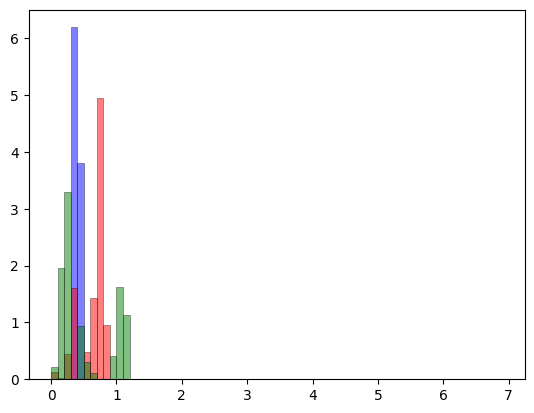

In [93]:
nz = np.random.randint(0, nzs.shape[0])
dz = 0.1
minz = 0.0
maxz = 7.0
bins = np.arange(minz, maxz, dz)

plot_realisation(nz, nzs, bins, 0.5)
print("realisation_number: ", nz)
print("mean_dust: ", np.mean(sps_params[nz][:, 4]))
print("var_dust: ", np.std(sps_params[nz][:, 4]))

(array([13265., 13590., 13971., 14715., 15048., 15510., 16043., 16142.,
        16680., 16884., 17178., 17371., 17504., 17716., 17785., 18176.,
        18140., 18081., 18173., 17951., 18115., 17896., 17734., 17607.,
        17217., 16934., 16502., 16585., 15886., 15601.]),
 array([1.13593988e-06, 6.66677345e-02, 1.33334333e-01, 2.00000932e-01,
        2.66667530e-01, 3.33334129e-01, 4.00000728e-01, 4.66667326e-01,
        5.33333925e-01, 6.00000523e-01, 6.66667122e-01, 7.33333721e-01,
        8.00000319e-01, 8.66666918e-01, 9.33333516e-01, 1.00000012e+00,
        1.06666671e+00, 1.13333331e+00, 1.19999991e+00, 1.26666651e+00,
        1.33333311e+00, 1.39999971e+00, 1.46666631e+00, 1.53333290e+00,
        1.59999950e+00, 1.66666610e+00, 1.73333270e+00, 1.79999930e+00,
        1.86666590e+00, 1.93333250e+00, 1.99999909e+00]),
 <BarContainer object of 30 artists>)

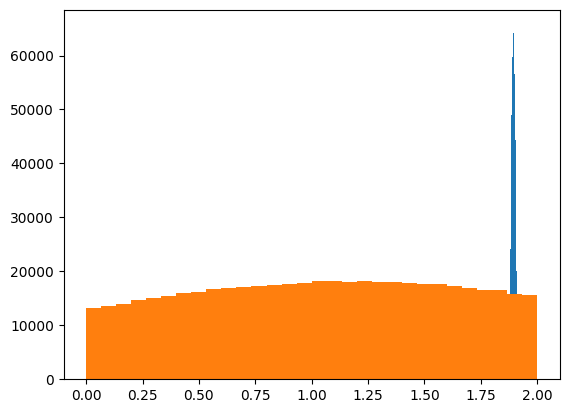

In [94]:
plt.hist(sps_params[nz][:, 3], bins=30)
plt.hist(sps_params[nz][:, 4], bins=30)
#plt.hist(sps_params[2][:, 13], bins=30)